In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


## Open and explore the dataset

In [2]:
public_df =  pd.read_pickle("public_df-1.pkl")
public_df.sample(3)

,SPC original,SPC dental,SPC imputed,MoCap platform,Date of acquisition,Age at acquisition,Public ID,Protocol name,Protocol ID,Protocol ID clinicaltrials.gov,Movement,Gender,Diagnosis
516,"[[[-10.3107, 214.865, 631.839], [-14.4157, 200...","[[[-10.3107, 214.865, 631.839], [-14.4157, 200...","[[[0.4336223581076742, 0.8387003817257048, 0.9...",UTC,2018-01-31,47.0,29,SIMOVI 2,ID-RCB 2016-A00716-45,NCT 03115203,5,F,Facial palsy
424,"[[[13.9019, 150.413, 655.967], [13.5008, 143.8...","[[[13.901900000000001, 150.41299999999998, 655...","[[[0.7346410047466994, 0.9100009450257684, 0.9...",UTC,NaT,NaN,36,SIMOVI 2,ID-RCB 2016-A00716-45,NCT 03115203,4,M,Facial palsy
189,"[[[70.8029, 179.485, 641.188], [69.3567, 175.4...","[[[70.8029, 179.485, 641.188], [69.35669999999...","[[[0.7491501933461507, 0.8069306925252405, 0.9...",UTC,2018-01-31,61.0,32,SIMOVI 2,ID-RCB 2016-A00716-45,NCT 03115203,4,F,Facial palsy


## Visualize a PC using Open3D

In [3]:
# Select a row at random
row = public_df.sample(1)
spc = row["SPC original"].values[0]

# Select a timestep at random
t = np.random.randint(0, spc.shape[0])
pc = spc[t]

# Visualize the point cloud
pcd = o3d.geometry.PointCloud()
v3d = o3d.utility.Vector3dVector
pcd.points = v3d(pc)
o3d.visualization.draw_geometries([pcd])

## Visualize a group of point clouds

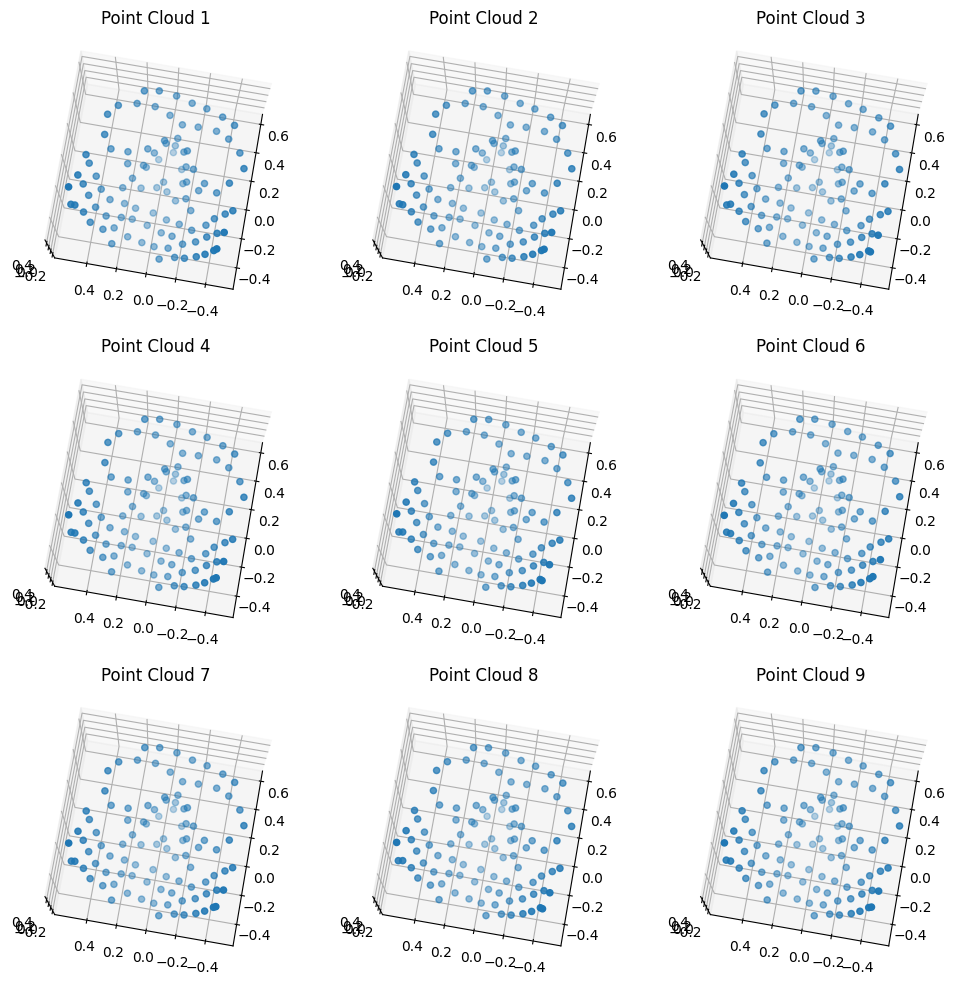

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA


# Select 9 rows at random
rows = public_df.sample(9)
SPC = rows["SPC imputed"].values

# Define a timestep
t = 0
fig = plt.figure(figsize=(10, 10))

# Define standard viewing angles
elev = 80   # Elevation angle
azim = 190   # Azimuth angle

# Iterate over each point cloud
for i in range(9):
    # Perform PCA on the point cloud
    pca = PCA(n_components=3)
    transformed_cloud = pca.fit_transform(SPC[t][i])
    
    # Create a subplot for this point cloud
    ax = fig.add_subplot(3, 3, i+1, projection='3d')
    
    # Plot the transformed point cloud
    ax.scatter(transformed_cloud[:, 0], transformed_cloud[:, 1], transformed_cloud[:, 2])
    ax.view_init(elev, azim)
    
    ax.set_title(f'Point Cloud {i+1}')
    
plt.tight_layout()
plt.show()


## Export the dataset to csv file

In [5]:
# Drop columns
public_df = public_df.drop(columns=["SPC original", "SPC imputed", "SPC dental"])

# Export the dataframe to a csv file
public_df.to_csv("public_df-1.csv", index=False)